<a href="https://colab.research.google.com/github/Ritchar/pdsei-2023-richard-robles/blob/Practicas/Laboratorio_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



**ESCUELA DE INGENIERÍA MECATRÓNICA**
#PROCESAMIENTO DIGITAL DE SEÑALES E IMÁGENES
Docente: Ms. Ing. Emerson Maximo Asto Rodriguez

Práctica 2: Filtros media movil / filtro gaussiano


###**2.1. Importación de Librerías y creación de la señal de prueba**






* **Librerias a utilizar:**


In [9]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("dark_background")

Creacion de una señal con ruido


In [12]:
fm=1000 #frecuencia de muestreo
t=np.arange(0, 3, 1/fm)  #variable independiente discreta
dimension_t = len(t)
print(dimension_t)

p=20
amplitud_ruido= 10

senial= np.interp(np.linspace(0,20,dimension_t), np.arange(0,20),np.random.rand(p)*30)
ruido = amplitud_ruido* np.random.rand(dimension_t)

senial_ruidosa= senial+ruido

3000


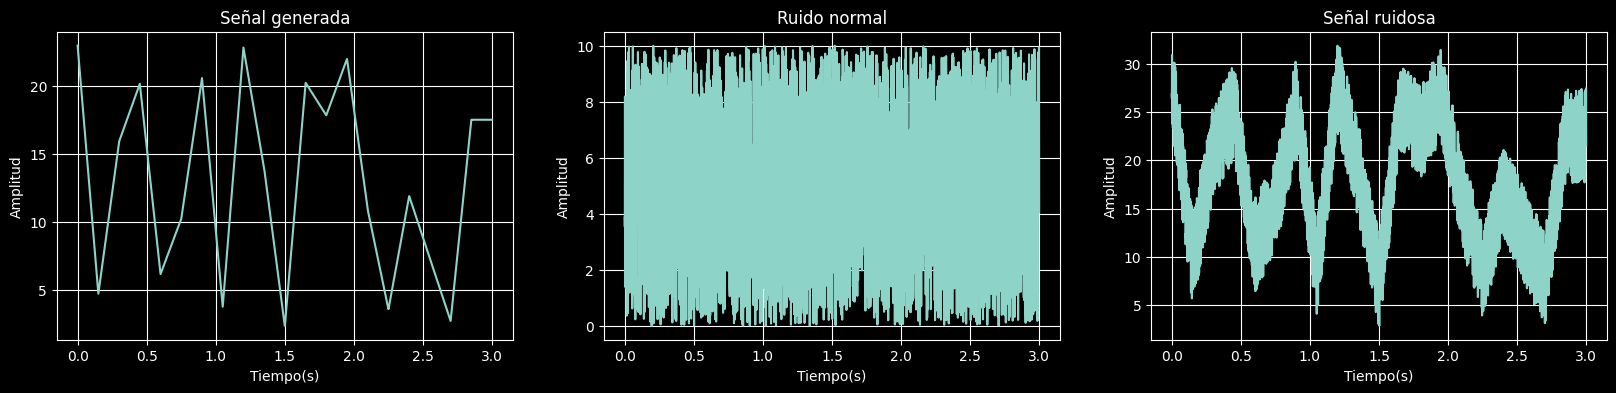

In [13]:
plt.subplots(1,3, figsize=(20,4))

plt.subplot(131)
plt.plot(t,senial)
plt.grid(True)
plt.title("Señal generada")
plt.xlabel("Tiempo(s)")
plt.ylabel("Amplitud")

plt.subplot(132)
plt.plot(t,ruido)
plt.grid(True)
plt.title("Ruido normal")
plt.xlabel("Tiempo(s)")
plt.ylabel("Amplitud")

plt.subplot(133)
plt.plot(t,senial_ruidosa)
plt.grid(True)
plt.title("Señal ruidosa")
plt.xlabel("Tiempo(s)")
plt.ylabel("Amplitud")
plt.show()

* **Aplicación del filtro media movil:**


41.0


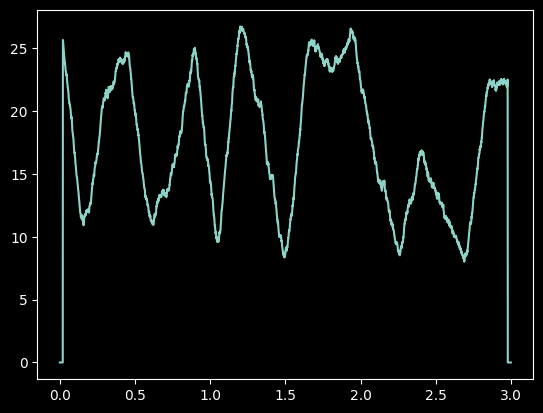

In [14]:
k=20
senial_filtrada = np.zeros_like(senial_ruidosa)

for i in range(k, dimension_t-k-1):
  senial_filtrada[i]=np.mean(senial_ruidosa[i-k:i+k])
tamanio_ventana = 1000*((2*k+1)/fm)
print(tamanio_ventana)

plt.plot(t,senial_filtrada)

* **Gráficas de los resutados:**

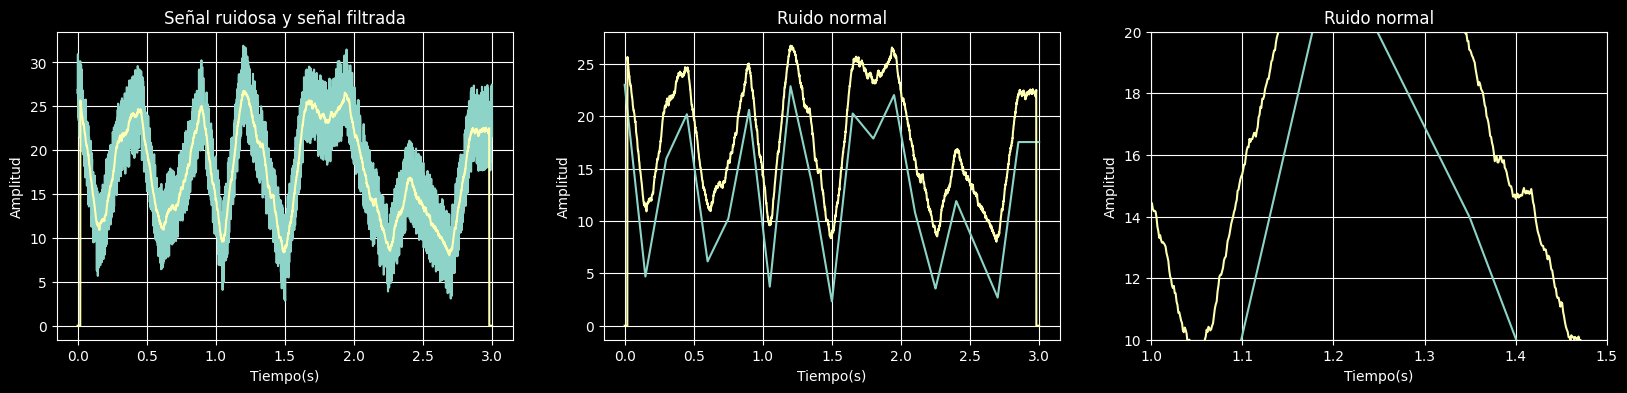

In [15]:
plt.subplots(1,3, figsize=(20,4))

plt.subplot(131)
plt.plot(t,senial_ruidosa)
plt.plot(t,senial_filtrada)
plt.grid(True)
plt.title("Señal ruidosa y señal filtrada")
plt.xlabel("Tiempo(s)")
plt.ylabel("Amplitud")

plt.subplot(132)
plt.plot(t,senial)
plt.plot(t,senial_filtrada)
plt.grid(True)
plt.title("Ruido normal")
plt.xlabel("Tiempo(s)")
plt.ylabel("Amplitud")

plt.subplot(133)
plt.plot(t,senial)
plt.plot(t,senial_filtrada)
plt.grid(True)
plt.title("Ruido normal")
plt.xlabel("Tiempo(s)")
plt.ylabel("Amplitud")

plt.axis([1,1.5,10,20])
plt.show()

* **Creación del filtro gaussiano:**

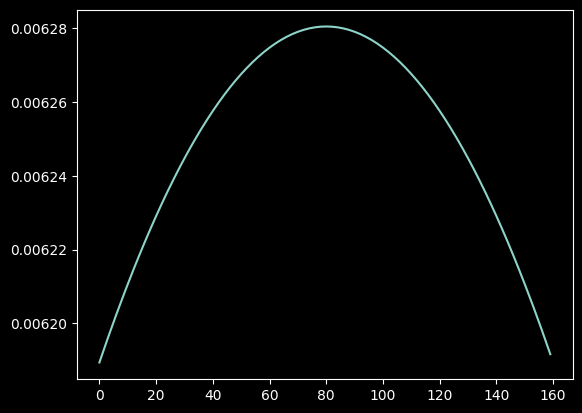

In [25]:
FWHM = 25
k =80

gauss_t = 1000*np.arange(-k, k)/fm

filtro_gaussiano= np.exp(-4*(np.log(2)*gauss_t**2)/FWHM**2)
filtro_gaussiano_normalizado = filtro_gaussiano/np.sum(filtro_gaussiano)
filtro_gaussiano_normalizado = np.expand_dims(filtro_gaussiano_normalizado, axis=-1)
flanco_subida=np.argmin((filtro_gaussiano-.5)**2)
flanco_bajada= k+np.argmin((filtro_gaussiano[k:]-.5)**2)
FWHM_calculado= gauss_t[flanco_subida]-gauss_t[flanco_bajada]
plt.plot(filtro_gaussiano_normalizado)

* **Aplicación del filtro Gaussiano:**

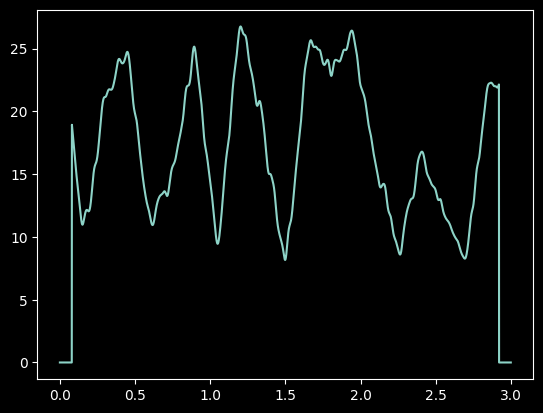

In [17]:

senial_filtrada_gauss = np.zeros_like(senial_ruidosa)

for i in range(k, dimension_t-k+1):
  senial_filtrada_gauss[i]=np.sum(senial_ruidosa[i-k:i+k]*filtro_gaussiano_normalizado)
#tamanio_ventana = 1000*((2*k+1)/fm)
#print(tamanio_ventana)

plt.plot(t,senial_filtrada_gauss)

* **Mostrando los resultados:**

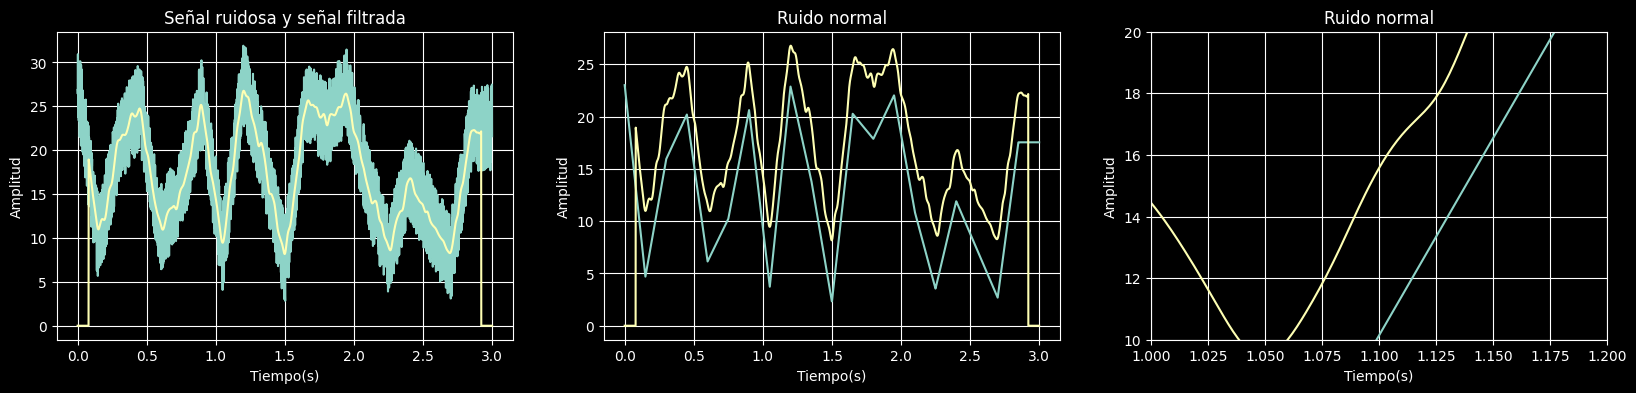

In [18]:
plt.subplots(1,3, figsize=(20,4))

plt.subplot(131)
plt.plot(t,senial_ruidosa)
plt.plot(t,senial_filtrada_gauss)
plt.grid(True)
plt.title("Señal ruidosa y señal filtrada")
plt.xlabel("Tiempo(s)")
plt.ylabel("Amplitud")

plt.subplot(132)
plt.plot(t,senial)
plt.plot(t,senial_filtrada_gauss)
plt.grid(True)
plt.title("Ruido normal")
plt.xlabel("Tiempo(s)")
plt.ylabel("Amplitud")

plt.subplot(133)
plt.plot(t,senial)
plt.plot(t,senial_filtrada_gauss)
plt.grid(True)
plt.title("Ruido normal")
plt.xlabel("Tiempo(s)")
plt.ylabel("Amplitud")

plt.axis([1,1.2,10,20])
plt.show()

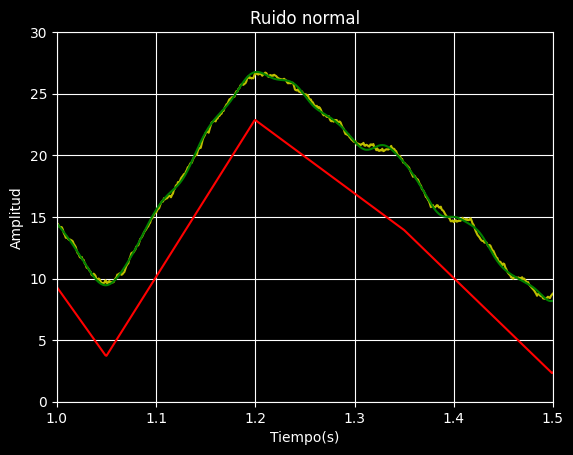

In [19]:
plt.plot(t,senial,"r")
plt.plot(t,senial_filtrada,"y")
plt.plot(t,senial_filtrada_gauss,"g")
plt.grid(True)
plt.title("Ruido normal")
plt.xlabel("Tiempo(s)")
plt.ylabel("Amplitud")

plt.axis([1,1.5,0,30])
plt.show()

*pip* install pysoundfile




pip install bitstring


In [20]:
import requests

url = "https://vvestman.github.io/summerschool19/sounds/Im_Superman.wav"
nombre_archivo = "Im_Superman.wav"

# Descarga el archivo desde la URL
response = requests.get(url)

# Guarda el archivo en tu sistema
with open(nombre_archivo, "wb") as archivo:
    archivo.write(response.content)

print(f"Archivo '{nombre_archivo}' descargado con éxito.")


Archivo 'Im_Superman.wav' descargado con éxito.


In [21]:
import IPython
IPython.display.Audio('Im_Superman.wav')

tasa de muestreo:1000 muestras/segundo
Tamaño de la señal:411889 muestras
Duración:411.889 segundos


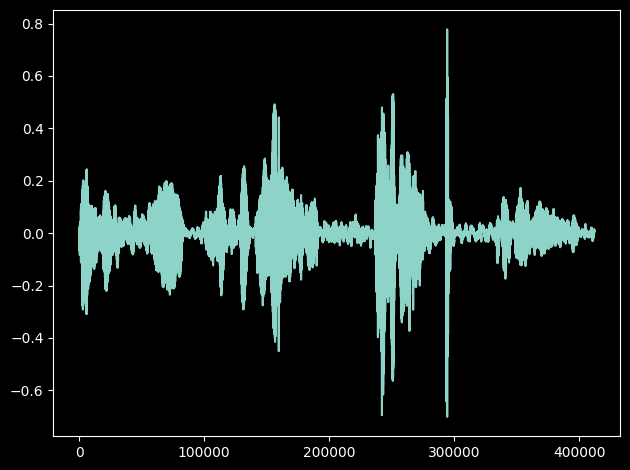

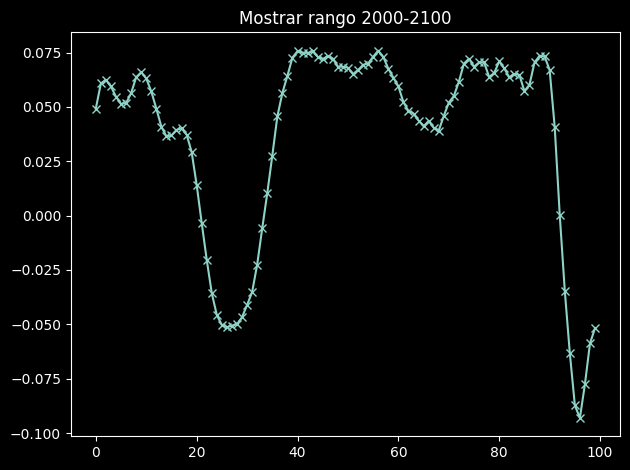

In [22]:
import soundfile
import matplotlib.pyplot as plt

audio_signal, sampling_rate =soundfile.read('Im_Superman.wav')

type(audio_signal)
print('tasa de muestreo:{} muestras/segundo'.format(fm))
print('Tamaño de la señal:{} muestras'.format(audio_signal.shape[0]))
print('Duración:{:.3f} segundos'.format(audio_signal.shape[0]/fm))
plt.plot(audio_signal)
plt.tight_layout()
plt.figure()
plt.plot(audio_signal[2000:2100],marker='x')
plt.title('Mostrar rango 2000-2100')
plt.tight_layout()